## Musicstore data analysis :

#### /* Q1.Who is the senior most employee based on job title  */

In [ ]:
select last_name ,levels, first_name , employee_id from employee
order by levels desc
limit 1;

###### levels are assigned on employees based on there presence in the company so higher the level the senior is the employee.So using the order by levels desending and limit  1  we can get the most senoir employee.

#### Output:

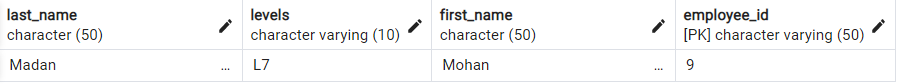

###### So, Madan Mogan is our most senior employee.

#### /*Q2:  Who is the most recent hire */

In [ ]:
select last_name, first_name from employee 
order by hire_date desc 
limit 1;

###### sorting the ouput based on the hire date desc which will give the recent hires and using limit to find the most recent hire

#### Output:

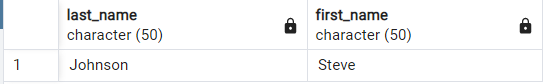

###### So, John Steve is the most recent hire.

#### /* Q3. Which country has the most invoices*/

In [ ]:
select * from invoice;
select count(invoice_id) , billing_country from invoice
group by billing_country
order by count(invoice_id) desc ; 

###### Using group by on the billing_country column to get the count of the invoice generated in the country.

#### Output:

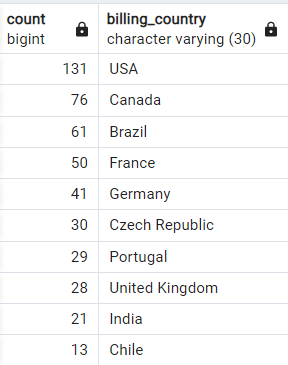

###### So USA is having the highest invoice count of 131

#### /* Q4: What are top 3 values of total invoice? */

In [ ]:
select round(total) as total from invoice 
order by  total desc
limit 3;

###### Using limit and order by desc to find the top three values in the invoice['total'] column

#### Output:

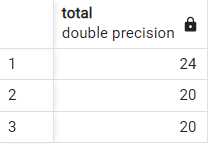

###### So, the top three values of total_invoice are 24,20,20.

#### /* Q5: Which city has the best customers? We would like to throw a promotional Music Festival in the city we made the most money. Write a query that returns one city that has the highest sum of invoice totals. Return both the city name & sum of all invoice totals */

In [ ]:
select sum(total) as invoice_total , billing_city from invoice
group by billing_city 
order by sum(total) desc;

###### Using the sum function on the total column and using group by billing_city to get the total invoice geneated by city. This will show the city in descending order based on the sum of total invoice.

#### Output:

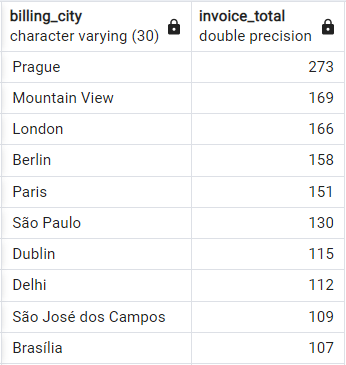

###### So,Prague has the best customers with a invoice_total of 273 

#### /* Q6: Who is the best customer? The customer who has spent the most money will be declared the best customer. Write a query that returns the person who has spent the most money.*/

In [ ]:
SELECT customer.customer_id, first_name, last_name, SUM(total) AS total_spending
FROM customer
JOIN invoice ON customer.customer_id = invoice.customer_id
GROUP BY customer.customer_id
ORDER BY total_spending DESC
LIMIT 1;

###### Using inner join on the customer and invoice table to fetch the customer_id, first name, last name, from customer table and sum of total from invoice table on the basis of the customer_id which is the foreign key.Then using group the output based on the customer_id and sorting the output by total_spending using the order by clause. Using limit fetch only the top record and finally rounding the total_spending.

#### Output:

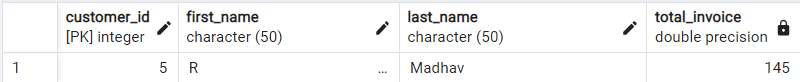

###### So, R_Madhav, customer_id = 5 , is the best customer, he has a toal_invoice of  145.

#### /* Q7 Write query to return the email, first name, last name, & Genre of all Rock Music listeners. Return your list ordered alphabetically by email starting with A. */

##### Relationships -
- custoemr.customer_id = invoice.customer_id
- invoice.invoice_id = invoice_line.invoice_id
- track.genre_id = genre.genre_id
- track.track_id = invoice_line.track_id
- genre.genre_id = track.genre_id

Objective : to extract information from the customers table, using joins on the defined realtionship to check for the 'Rock' variable from the genre.name. 

In [ ]:
SELECT DISTINCT email,first_name, last_name
FROM customer
JOIN invoice ON customer.customer_id = invoice.customer_id
JOIN invoice_line ON invoice.invoice_id = invoice_line.invoice_id
WHERE track_id IN(
	SELECT track_id FROM track
	JOIN genre ON track.genre_id = genre.genre_id
	WHERE genre.name LIKE 'Rock'
)
ORDER BY email;

######  selecting the email, first_name, last_name from customers,then using inner join on customer table with invoice table. >Joining the invoice table with the invoice_line table , > checking for track_id in invoice table with the track_id in the track table. >fetching only the track_id which are in the sub query >Using subquery in which we are using join on the track and genre table to  fetch the track_id where the genre name is 'Rock'.

#### Output:

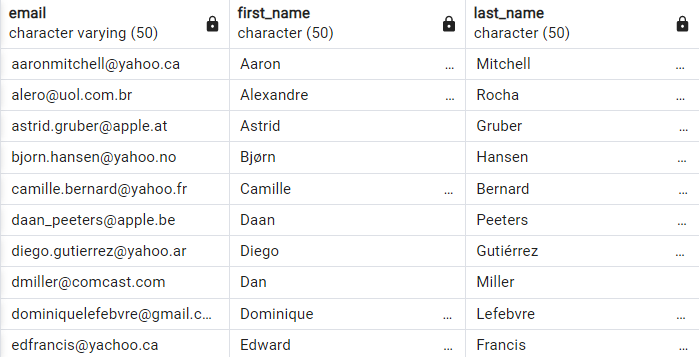

#### /* Q8 Let's invite the artists who have written the most rock music in our dataset. Write a query that returns the Artist name and total track count of the top 10 rock bands. */

##### Relationships -
- album.album_id = track.album_id
- artist.artist_id = album.artist_id
- genre.genre_id = track.genre_id

Objective: The number of times artist_id is in the table is the count of songs. Join the tables based on the realationships and fetching only the genre 'Rock'.

In [ ]:
SELECT artist.artist_id, artist.name,COUNT(artist.artist_id) AS number_of_songs
FROM track
JOIN album ON album.album_id = track.album_id
JOIN artist ON artist.artist_id = album.artist_id
JOIN genre ON genre.genre_id = track.genre_id
WHERE genre.name LIKE 'Rock'
GROUP BY artist.artist_id
ORDER BY number_of_songs DESC
LIMIT 10;

###### selecting artist_id , artist_name and count of artist_id from the artist table, Using inner join on the album- track , artist-album, genre-track,in where clause using the condition to fetch all the records from  genre.name  = 'Rock' and finnally grouping the result based on the artist_id , sorting in descending order based on the count of aritst_id and limiting the result to 10 records.

#### Output:

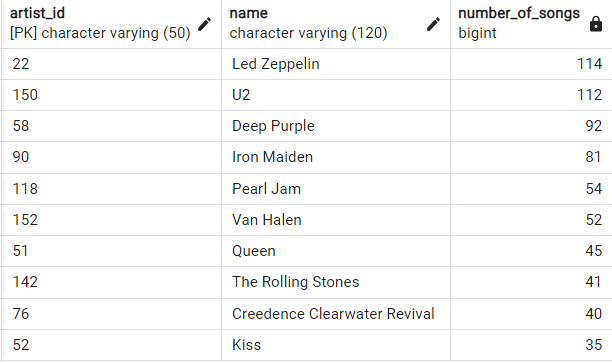

###### Led Zeppeline is having the highest number of songs.

#### /*Q9 Return all the track names that have a song length longer than the average song length. Return the Name and Milliseconds for each track. Order by the song length with the longest songs listed first. */


In [ ]:
select name, milliseconds from track 
where milliseconds> (select avg(milliseconds) from track)
order by milliseconds desc;

###### selecting name, millisecond from track. In where clause creating a subquery to find the avgerage of the milliseconds from track table. Finally fetching records based on the condition milliseconds > subquery. Sorting the data by milliseconds in descending order.

#### Output:

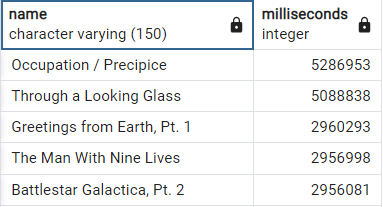

###### So the Occupation/Precipice is the longest song.

#### /*Q10 Return all the track names that have a song length shorter than the average song length. Return the Name and Milliseconds for each track. Order by the song length with the longest songs listed first. */

In [ ]:
select name, milliseconds from track 
where milliseconds> (select avg(milliseconds) from track)
order by milliseconds ;

###### selecting name, millisecond from track. In where clause creating a subquery to find the avgerage of the milliseconds from track table. Finally fetching records based on the condition milliseconds > subquery. Sorting the data by milliseconds in ascending order.

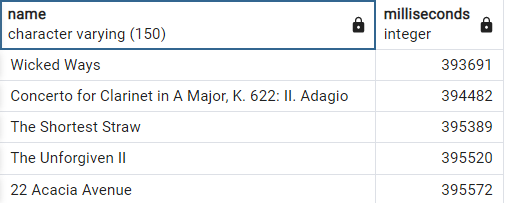

######  Wicked Ways is the shortest song from all the records greater than the average.

## Advance Query:-

#### /* Q1: Find how much amount spent by each customer on artists? Write a query toreturn customer name, artist name and total spent */

In [ ]:

WITH best_selling_artist AS (
	SELECT artist.artist_id AS artist_id, artist.name AS artist_name, 
    SUM(invoice_line.unit_price*invoice_line.quantity) AS total_sales
	FROM invoice_line
	JOIN track ON track.track_id = invoice_line.track_id
	JOIN album ON album.album_id = track.album_id
	JOIN artist ON artist.artist_id = album.artist_id
	GROUP BY 1
	ORDER BY 3 DESC
	LIMIT 1
)
SELECT c.customer_id, c.first_name, c.last_name, bsa.artist_name,
SUM(il.unit_price*il.quantity) AS amount_spent
FROM invoice i
JOIN customer c ON c.customer_id = i.customer_id
JOIN invoice_line il ON il.invoice_id = i.invoice_id
JOIN track t ON t.track_id = il.track_id
JOIN album alb ON alb.album_id = t.album_id
JOIN best_selling_artist bsa ON bsa.artist_id = alb.artist_id
GROUP BY 1,2,3,4
ORDER BY 5 DESC;

This SQL query performs the following operations:

- It creates a temporary table called "best_selling_artist" using a subquery that joins the "invoice_line," "track," "album," and "artist" tables and calculates the total sales for each artist. - - It then orders the results by total sales in descending order and selects the top row using the LIMIT clause.
- The main query then joins several tables to retrieve data about customer purchases and artist sales. - It joins the "invoice," "customer," "invoice_line," "track," and "album" tables and uses the temporary table to filter results by the best-selling artist.
- The main query then groups the results by customer ID, first name, last name, and artist name and calculates the total amount spent on the best-selling artist using the SUM function.
- Finally, the main query orders the results by the amount spent in descending order.

#### Output:

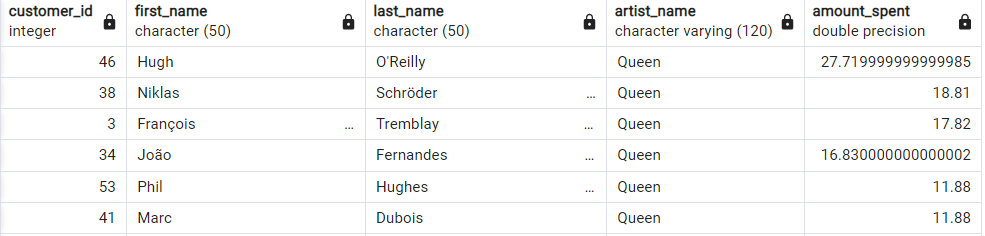

#### /* Q2: We want to find out the most popular music Genre for each country. We determine the most popular genre as the genre with the highest amount of purchases. Write a query that returns each country along with the top Genre. For countries where the maximum number of purchases is shared return all Genres. */

##### Relationships
- custoemr.customer_id = invoice.customer_id
- invoice.invoice_id = invoice_line.invoice_id
- track.genre_id = genre.genre_id
- track.track_id = invoice_line.track_id
- genre.genre_id = track.genre_id
Objective :  There are two parts in question- first most popular music genre and second need data at country level. 

In [ ]:
WITH popular_genre AS 
(
    SELECT COUNT(invoice_line.quantity) AS purchases, customer.country, genre.name, genre.genre_id, 
	ROW_NUMBER() OVER(PARTITION BY customer.country ORDER BY COUNT(invoice_line.quantity) DESC) AS RowNo 
    FROM invoice_line 
	JOIN invoice ON invoice.invoice_id = invoice_line.invoice_id
	JOIN customer ON customer.customer_id = invoice.customer_id
	JOIN track ON track.track_id = invoice_line.track_id
	JOIN genre ON genre.genre_id = track.genre_id
	GROUP BY 2,3,4
	ORDER BY 2 ASC, 1 DESC
)
SELECT * FROM popular_genre WHERE RowNo <= 1


This SQL query creates a temporary table called "popular_genre" using a subquery that joins several tables to retrieve data about customer purchases by genre and country. The query performs the following operations:

- It joins the "invoice_line," "invoice," "customer," "track," and "genre" tables to retrieve data about customer purchases by genre and country.
- The temporary table then groups the results by country, genre name, and genre ID and counts the number of purchases in each group using the COUNT function.
- The temporary table also adds a column called "RowNo" using the ROW_NUMBER function, which assigns a rank to each genre based on the number of purchases in each country.
- Finally, the main query selects all rows from the temporary table where the RowNo is less than or equal to 1, which means it selects the most popular genre in each country.

#### Output:

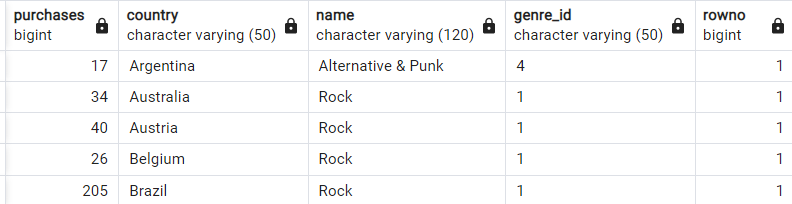

#### /* Q3: Write a query that determines the customer that has spent the most on music for each country. Write a query that returns the country along with the top customer and how much they spent. For countries where the top amount spent is shared, provide all customers who spent this amount. */

#### Realtionship
- customer.customer_id = invoice.customer_id

Objective : Similar to the above question. There are two parts in question- 
first find the most spent on music for each country and second filter the data for respective customers. 

In [ ]:
WITH Customter_with_country AS (
		SELECT customer.customer_id,first_name,last_name,billing_country,SUM(total) AS total_spending,
	    ROW_NUMBER() OVER(PARTITION BY billing_country ORDER BY SUM(total) DESC) AS RowNo 
		FROM invoice
		JOIN customer ON customer.customer_id = invoice.customer_id
		GROUP BY 1,2,3,4
		ORDER BY 4 ASC,5 DESC)
SELECT * FROM Customter_with_country WHERE RowNo <= 1

This SQL query performs the following operations:

- It creates a temporary table called "Customter_with_country" using a subquery that joins the "invoice" and "customer" tables and groups the results by customer ID, first name, last name, and billing country.
- The temporary table then calculates the total spending for each customer in each billing country using the SUM function.
- The temporary table also adds a column called "RowNo" using the ROW_NUMBER function, which assigns a rank to each customer based on their total spending in each billing country.
- Finally, the main query selects all rows from the temporary table where the RowNo is less than or equal to 1, which means it selects the top-spending customer in each billing country.

#### Output:

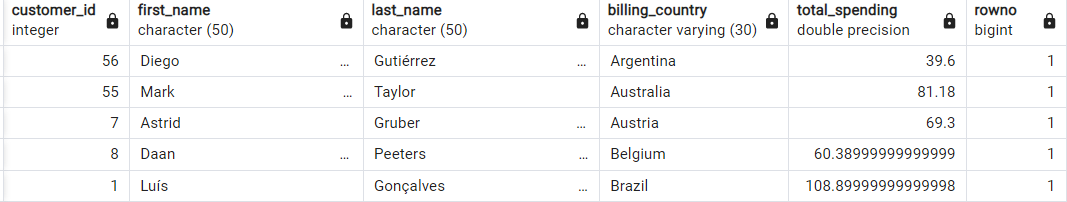